In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
import utils.ssvep_analysis as sa

In [2]:
file_path = '../data/2024-01-12/Geri_Deuteranomaly_0.0_multicolor-deuteranomaly-series_frequency_16.5_tile-size144_8e3e867f-c88b-4fac-afa4-a77c93890989.csv'
df = pd.read_csv(file_path, skiprows=10, header=None)

with open(file_path, 'r') as file:
    content = file.read()
    
match = re.search(r'Frequency:\s*(\d+(\.\d+)?)', content)
stimulus_frequency = float(match.group(1)) if match else None

eeg_data = df.to_numpy()[250:-250, 1:9].astype(float)
marker = df.to_numpy()[250:-250, -1].flatten()

sa.update_default_stimulus_frequency(stimulus_frequency)

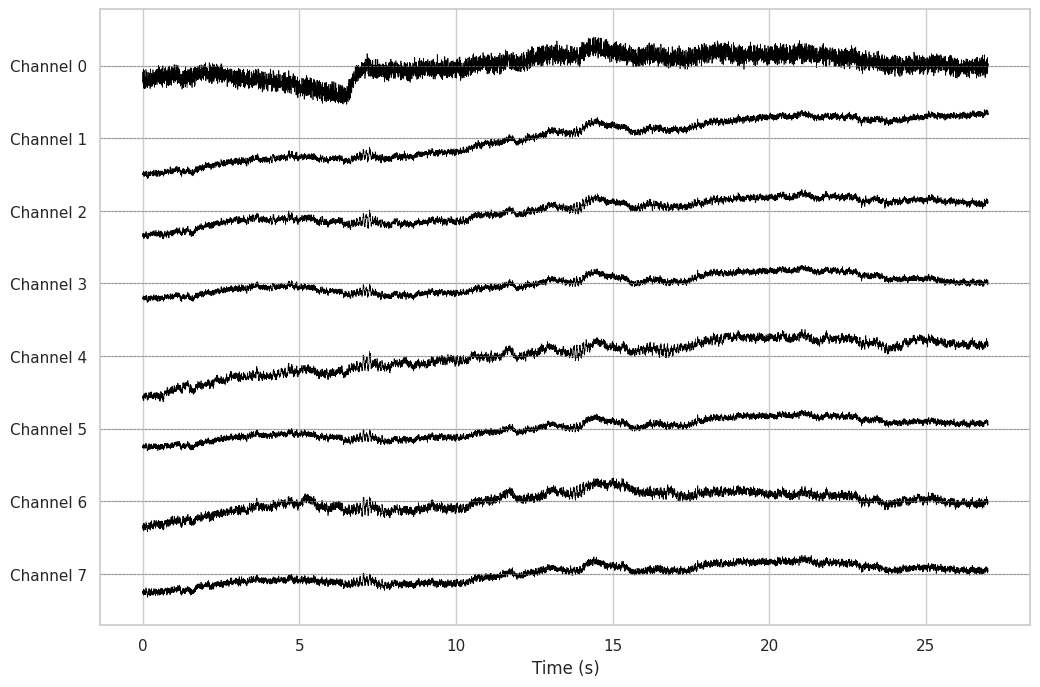

In [3]:
sa.plot_eeg(eeg_data);

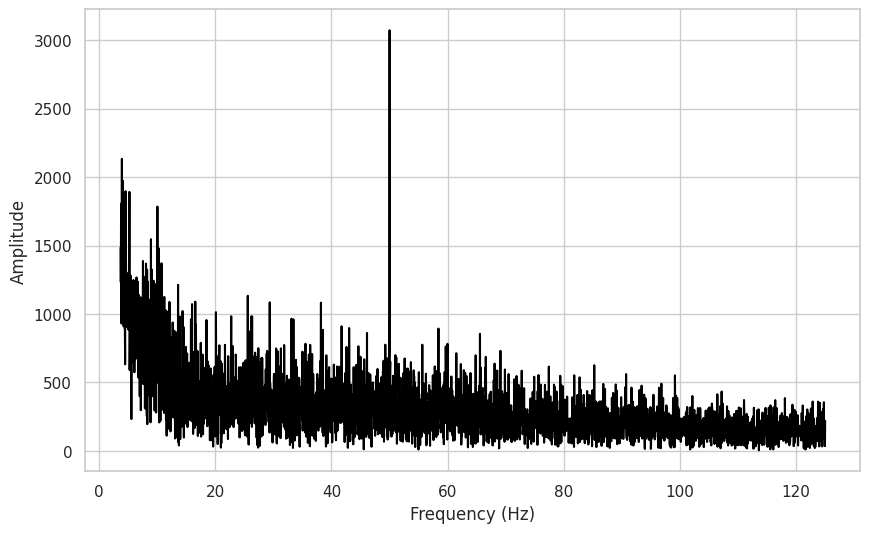

In [8]:
frequencies, spectrum = sa.compute_power_spectrum(eeg_data)
sa.plot_power_spectrum(frequencies[100:], spectrum[100:,1]);

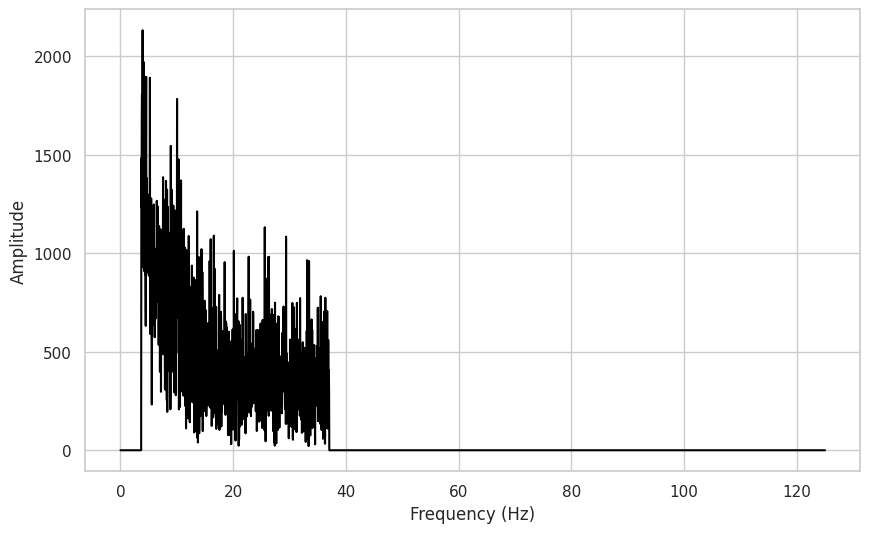

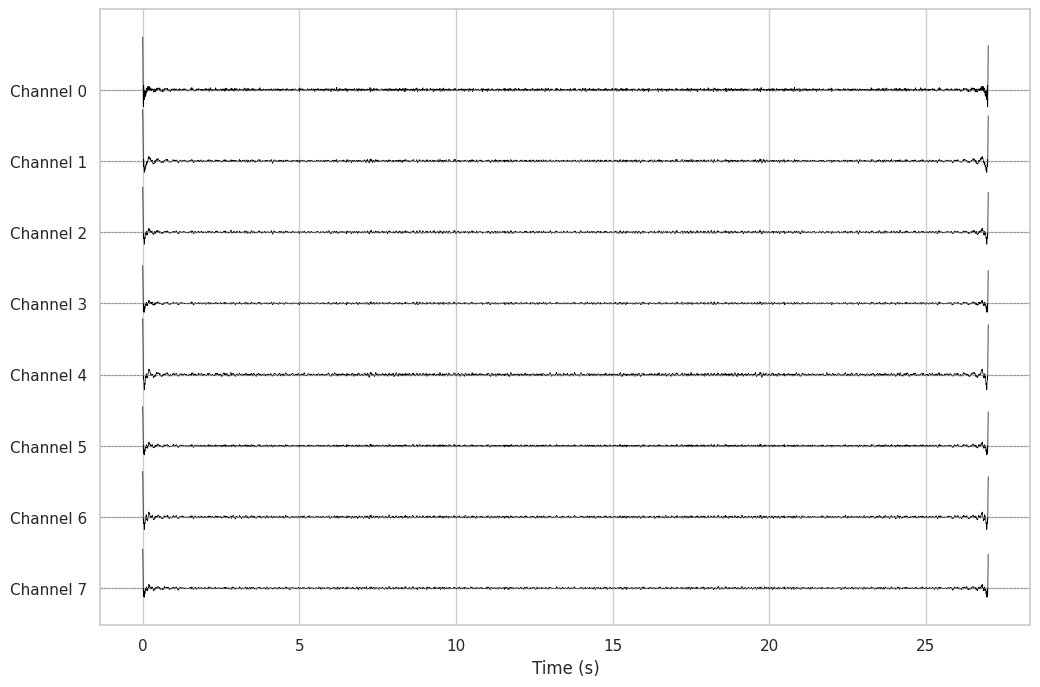

In [10]:

spectrum = np.abs(np.fft.rfft(eeg_data, axis=0))
frequencies = np.fft.rfftfreq(eeg_data.shape[0], 1.0/250)
spectrum[:100] = 0
spectrum[1000:] = 0
sa.plot_power_spectrum(frequencies, spectrum[:,1]);
plt.show()

inverse = np.fft.irfft(spectrum, axis=0)
sa.plot_eeg(inverse);